# Extract from: A Gene Ontology Tutorial in Python - Model Solutions to Exercises

This is a subset of the electronic exercises (with solutions) accompanying the book chapter ["A Gene Ontology Tutorial in Python"](https://link.springer.com/protocol/10.1007/978-1-4939-3743-1_16) by Alex Warwick Vesztrocy and Christophe Dessimoz, from _The Gene Ontology Handbook_, C Dessimoz and N Skunca Eds, Springer Humana. The complete file is available [here](http://gohandbook.org/doku.php).

Version: 1.0.2 (Feb 2019): _Updated QuickGO API calls and usage of GOATOOLS to version 0.8.12_

## Querying the Gene Ontology

First, we need to load the GOATools library. This enables us to parse the Gene Ontology (GO) OBO file. For more information on GOATools, see <a href="https://github.com/tanghaibao/goatools">their documentation</a>.

To install goatools, do the following. First, add `bioconda`to your channels:
```
conda config --add channels defaults
conda config --add channels bioconda
conda config --add channels conda-forge
```
next, install goatools by typing:
```
conda install goatools
```

Alternatively, install with `pip`:
```
pip install goatools
```

If , through the use if this script, you find some problems with uninstalled libraries, use the usual `conda`, `pip`, `brew`, etc, methods to keep going.

In [1]:
# Import the OBO parser from GOATools
from goatools import obo_parser

In order to download the GO OBO file, we also require the <code>wget</code> and <code>os</code> libraries. See more information [here](http://geneontology.org/docs/download-ontology/).

In [2]:
import wget
import os

Now, we can download the OBO file into the <code>'./data'</code> folder using the following. We are going to download the <code>go-basic.obo</code> version of the ontology, which is guaranteed to be acyclic, which means that annotations can be propagated up the graph.

In [3]:
go_obo_url = 'http://purl.obolibrary.org/obo/go/go-basic.obo'
data_folder = os.getcwd() + '/data'

# Check if we have the ./data directory already
if(not os.path.isfile(data_folder)):
    # Emulate mkdir -p (no error if folder exists)
    try:
        os.mkdir(data_folder)
    except OSError as e:
        if(e.errno != 17):
            raise e
else:
    raise Exception('Data path (' + data_folder + ') exists as a file. '
                   'Please rename, remove or change the desired location of the data path.')

# Check if the file exists already
if(not os.path.isfile(data_folder+'/go-basic.obo')):
    go_obo = wget.download(go_obo_url, data_folder+'/go-basic.obo')
else:
    go_obo = data_folder+'/go-basic.obo'

The path to the GO OBO file is now stored in the variable <code>go_obo</code>.

In [4]:
print(go_obo)

/Users/annaballus/GitHub/Introduction-to-Bioinformatics/theoretical/T06 Gene Lists/data/go-basic.obo


Now we can create a dictionary of the GO terms, using the <code>obo_parser</code> from GOATools.

In [5]:
go = obo_parser.GODag(go_obo)

load obo file /Users/annaballus/GitHub/Introduction-to-Bioinformatics/theoretical/T06 Gene Lists/data/go-basic.obo


/Users/annaballus/GitHub/Introduction-to-Bioinformatics/theoretical/T06 Gene Lists/data/go-basic.obo: format-version(1.2) data-version(releases/2021-02-01)


50515 nodes imported


#### Question 1
What is the name of the GO term <code>GO:0048527</code>?

#### Answer 1

In [6]:
go_id = 'GO:0048527'
go_term = go[go_id]
print(go_term)

GO:0048527	level-05	depth-06	lateral root development [biological_process] 


In [7]:
print('GO term name: {}'.format(go_term.name))
print('GO term namespace: {}'.format(go_term.namespace))

GO term name: lateral root development
GO term namespace: biological_process


#### Question 2

What are the immediate parent(s) of the term <code>GO:00048527</code>?

#### Answer 2

In [8]:
for term in go_term.parents:
    print(term)

GO:0048528	level-04	depth-05	post-embryonic root development [biological_process] 


#### Question 3
What are the immediate children of the term <code>GO:0048527</code>?

#### Answer 3

In [9]:
for term in go_term.children:
    print(term)

#### Question 4
Recursively find all the parent and child terms of the term <code>GO:0048527</code>. _Hint_: use your solutions to the previous two questions, with a recursive loop.

#### Answer 4

First, we can define functions to find the parents and children of a GO term, as well as one that finds both - the transitive closure.

In [10]:
def transitive_closure(go_term, go):
    go_term_set = set()
    find_parents(go_term, go, go_term_set)
    find_children(go_term, go, go_term_set)
    return go_term_set
    
def find_parents(term1, go, go_term_set={}, ret=False):
    for term2 in term1.parents:
        go_term_set.update({term2})
        
        # Recurse on term to find all parents
        find_parents(term2, go, go_term_set)          
    if(ret):
        return go_term_set

def find_children(term1, go, go_term_set={}, ret=False):
    for term2 in term1.children:
        go_term_set.update({term2})
        
        # Recurse on term to find all children
        find_children(term2, go, go_term_set)
    if(ret):
        return go_term_set

Now we can create the transitive closure as a set by calling the following.

In [11]:
go_term_set = transitive_closure(go_term, go)

We can now print this out using the "pretty print"f eature that is inherited from GOATools.

In [12]:
for term in go_term_set:
    print(term)

GO:0048528	level-04	depth-05	post-embryonic root development [biological_process] 
GO:0008150	level-00	depth-00	biological_process [biological_process] 
GO:0032501	level-01	depth-01	multicellular organismal process [biological_process] 
GO:0032502	level-01	depth-01	developmental process [biological_process] 
GO:0048856	level-02	depth-02	anatomical structure development [biological_process] 
GO:0009791	level-02	depth-02	post-embryonic development [biological_process] 
GO:0048364	level-04	depth-04	root development [biological_process] 
GO:0090696	level-03	depth-04	post-embryonic plant organ development [biological_process] 
GO:0099402	level-03	depth-03	plant organ development [biological_process] 


An alternative method is by using an inbuilt function of GOATools.

In [13]:
rec = go[go_id]
parents = rec.get_all_parents()
children = rec.get_all_children()

In [14]:
for term in parents.union(children):
    print(go[term])

GO:0048856	level-02	depth-02	anatomical structure development [biological_process] 
GO:0048364	level-04	depth-04	root development [biological_process] 
GO:0032501	level-01	depth-01	multicellular organismal process [biological_process] 
GO:0008150	level-00	depth-00	biological_process [biological_process] 
GO:0099402	level-03	depth-03	plant organ development [biological_process] 
GO:0090696	level-03	depth-04	post-embryonic plant organ development [biological_process] 
GO:0048528	level-04	depth-05	post-embryonic root development [biological_process] 
GO:0032502	level-01	depth-01	developmental process [biological_process] 
GO:0009791	level-02	depth-02	post-embryonic development [biological_process] 


#### Question 5 
How many GO terms have the word “growth” in their name?

#### Answer 5

To do this, we can loop around every single GO term and check their name.

In [15]:
growth_count = 0
for go_term in go.values():
    if 'growth' in go_term.name:
        growth_count += 1
        
print('Number of GO terms with "growth" in their name: {}'.format(growth_count))

Number of GO terms with "growth" in their name: 690


#### Question 6
What is the deepest common ancestor term of <code>GO:0048527</code> and <code>GO:0097178</code>?

#### Answer 6

First, we can write a function that finds the common GO terms.

In [16]:
def common_parent_go_ids(terms, go):
    '''
        This function finds the common ancestors in the GO 
        tree of the list of terms in the input.
    '''
    # Find candidates from first
    rec = go[terms[0]]
    candidates = rec.get_all_parents()
    candidates.update({terms[0]})
    
    # Find intersection with second to nth term
    for term in terms[1:]:
        rec = go[term]
        parents = rec.get_all_parents()
        parents.update({term})
        
        # Find the intersection with the candidates, and update.
        candidates.intersection_update(parents)
        
    return candidates

Then we can define the deepest common ancestor of two terms, as follows:

In [17]:
def deepest_common_ancestor(terms, go):
    '''
        This function gets the nearest common ancestor 
        using the above function.
        Only returns single most specific - assumes unique exists.
    '''
    # Take the element at maximum depth. 
    return max(common_parent_go_ids(terms, go), key=lambda t: go[t].depth)

Then we can find the deepest common ancestor of the two terms in question. 

In [18]:
go_id1 = 'GO:0097178'
go_id_id1_dca = deepest_common_ancestor([go_id, go_id1], go)

In [19]:
print('The nearest common ancestor of\n\t{} ({})\nand\n\t{} ({})\nis\n\t{} ({})'
      .format(go_id, go[go_id].name, 
              go_id1, go[go_id1].name,
              go_id_id1_dca, go[go_id_id1_dca].name))

The nearest common ancestor of
	GO:0048527 (lateral root development)
and
	GO:0097178 (ruffle assembly)
is
	GO:0008150 (biological_process)



Using the <code>get_term()</code> function, listed below, answer the following questions.

*Note*: the <code>get_oboxml()</code> function listed in the chapter, in Source Code 2.1, will no longer work. This is due to an API overhaul of the EMBL-EBI's QuickGO browser.

For the interested reader, it is also possible to use the <a href="https://github.com/cokelaer/bioservices"><code>bioservices</code> library</a>, in order to retrieve information from QuickGO (as well as many other web services).

In [20]:
from future.standard_library import install_aliases
install_aliases()
from urllib.request import urlopen
import json

def get_term(go_id):
    """
        This function retrieves the definition of a given Gene Ontology term,
        using EMBL-EBI's QuickGO browser.
        Input: go_id - a valid Gene Ontology ID, e.g. GO:0048527.
    """
    quickgo_url = "https://www.ebi.ac.uk/QuickGO/services/ontology/go/terms/" + go_id
    ret = urlopen(quickgo_url)
    
    # Check the response
    if(ret.getcode() == 200):
        term = json.loads(ret.read())
        return term['results'][0]
    else:
        raise ValueError("Couldn't receive information from QuickGO. Check GO ID and try again.")

#### Question 7 
Find the name and description of the GO term <code>GO:0048527</code>. _Hint_: print out the dictionary returned by the function and study its structure.

#### Answer 7
First, let's get the term information.

In [21]:
term = get_term(go_id)

It might be useful to study the structure of this dictionary, in order to answer this question.

In [22]:
term

{'id': 'GO:0048527',
 'isObsolete': False,
 'name': 'lateral root development',
 'definition': {'text': 'The process whose specific outcome is the progression of the lateral root over time, from its formation to the mature structure. A lateral root is one formed from pericycle cells located on the xylem radius of the root, as opposed to the initiation of the main root from the embryo proper.'},
 'children': [{'id': 'GO:2000023', 'relation': 'regulates'},
  {'id': 'GO:0010102', 'relation': 'part_of'},
  {'id': 'GO:1901332', 'relation': 'negatively_regulates'},
  {'id': 'GO:1902089', 'relation': 'part_of'},
  {'id': 'GO:1901333', 'relation': 'positively_regulates'}],
 'aspect': 'biological_process',
 'usage': 'Unrestricted'}

Now we can extract the relevant data.

In [23]:
print('Description of {} is:\n\t{}'.format(go_id, term['definition']['text']))

Description of GO:0048527 is:
	The process whose specific outcome is the progression of the lateral root over time, from its formation to the mature structure. A lateral root is one formed from pericycle cells located on the xylem radius of the root, as opposed to the initiation of the main root from the embryo proper.


#### Question 8
Look at the difference in the OBO-XML output for the GO terms <code>GO:00048527</code> and <code>GO:0097178</code>, then generate a table of the synonymous relationships of the term <code>GO:0097178</code>.

#### Answer 8

Firstly, generate the OBO-XML dictionary for this new term.

In [24]:
term1 = get_term(go_id1)

We can then extract the synonyms as follows.

In [25]:
term1

{'id': 'GO:0097178',
 'isObsolete': False,
 'name': 'ruffle assembly',
 'definition': {'text': 'The aggregation, arrangement and bonding together of a set of components to form a ruffle, a projection at the leading edge of a crawling cell; the protrusions are supported by a microfilament meshwork. The formation of ruffles (also called membrane ruffling) is thought to be controlled by a group of enzymes known as Rho GTPases, specifically RhoA, Rac1 and cdc42.',
  'xrefs': [{'dbCode': 'PMID', 'dbId': '12556481'},
   {'dbCode': 'URL', 'dbId': 'http:en.wikipedia.org/wiki/Membrane_ruffling'}]},
 'synonyms': [{'name': 'membrane ruffle formation', 'type': 'exact'},
  {'name': 'membrane ruffling', 'type': 'exact'}],
 'children': [{'id': 'GO:1900027', 'relation': 'regulates'},
  {'id': 'GO:1900028', 'relation': 'negatively_regulates'},
  {'id': 'GO:1900029', 'relation': 'positively_regulates'}],
 'aspect': 'biological_process',
 'usage': 'Unrestricted'}

In [26]:
term1['synonyms']

[{'name': 'membrane ruffle formation', 'type': 'exact'},
 {'name': 'membrane ruffling', 'type': 'exact'}]

In [27]:
synonyms = term1['synonyms']
print(synonyms)

[{'name': 'membrane ruffle formation', 'type': 'exact'}, {'name': 'membrane ruffling', 'type': 'exact'}]


As an example, this can be nicely formatted using the <code>AsciiTable</code> module in the terminaltables package (which you may need to install, as usual
```
conda install terminaltables
```

).

In [28]:
from terminaltables import AsciiTable

# Initialise table data and set header
table_data = [['Type', 'Synonym']]
for synonym in synonyms:
    table_data.append([synonym['type'], synonym['name']])
print(AsciiTable(table_data).table)

+-------+---------------------------+
| Type  | Synonym                   |
+-------+---------------------------+
| exact | membrane ruffle formation |
| exact | membrane ruffling         |
+-------+---------------------------+


## Retrieving GO annotations

In this section we will look at how to manipulate the Gene Association File (GAF) standard, using a parser from the BioPython package.

In [29]:
import Bio.UniProt.GOA as GOA

First we need to download a GAF file from the EBI FTP website, which hosts the current and all previous UniProt-GOA annotations. The links to these can be found on the <a href="https://www.ebi.ac.uk/GOA/downloads">EBI GOA Downloads page</a>. 

As an example, we are going to download the reduced GAF file containing gene association data for *Arabidopsis Thaliana*.
Have a look at the file by using, in the terminal,
```
gunzip goa_arabidopsis.gaf.gz 
less goa_arabidopsis.gaf
```
to understand its contents.

In [30]:
import os
from ftplib import FTP
arab_uri = '/pub/databases/GO/goa/ARABIDOPSIS/goa_arabidopsis.gaf.gz'
arab_fn = arab_uri.split('/')[-1]

# Check if the file exists already
#
# Note (JVF): be careful deleting the gaf file, as the GOATOOLS work at the time of adapting this document
#             with gaf version 2.1, while current version is 2.2. In case you mistakenly delete it and
#             re-download a version of the gaf file that is newer than 2.1, simply 
#             1) gunzip the gaf file in the terminal
#             2) edit and change the gaf version from 2.2 (or above, eventually) to 2.1 at the head of the gaf file
#             3) gzip it again and leave it in the ./data directory
#
arab_gaf = os.path.join(data_folder, arab_fn)
if(not os.path.isfile(arab_gaf)):
    # Login to FTP server
    ebi_ftp = FTP('ftp.ebi.ac.uk')
    ebi_ftp.login() # Logs in anonymously
    
    # Download
    with open(arab_gaf,'wb') as arab_fp:
        ebi_ftp.retrbinary('RETR {}'.format(arab_uri), arab_fp.write)
        
    # Logout from FTP server
    ebi_ftp.quit()

Now we can load all the annotations into a dictionary, using the iterator from the BioPython package (<code>Bio.UniProt.GOA.gafiterator</code>).

In [31]:
import gzip

# File is a gunzip file, so we need to open it in this way
with gzip.open(arab_gaf, 'rt') as arab_gaf_fp:
    arab_funcs = {}  # Initialise the dictionary of functions
    
    # Iterate on each function using Bio.UniProt.GOA library.
    for entry in GOA.gafiterator(arab_gaf_fp):
        uniprot_id = entry.pop('DB_Object_ID')
        arab_funcs[uniprot_id] = entry

Now we have a structure of the annotations which can manipulated. Each of the entries have been loaded in the following form.


In [32]:
print(arab_funcs[list(arab_funcs.keys())[0]])

{'DB': 'UniProtKB', 'DB_Object_Symbol': 'PIAL1', 'Qualifier': ['located_in'], 'GO_ID': 'GO:0005634', 'DB:Reference': ['GO_REF:0000044'], 'Evidence': 'IEA', 'With': ['UniProtKB-SubCell:SL-0191'], 'Aspect': 'C', 'DB_Object_Name': 'E4 SUMO-protein ligase PIAL1', 'Synonym': ['PIAL1', 'EMB3001', 'At1g08910', 'F7G19.21'], 'DB_Object_Type': 'protein', 'Taxon_ID': ['taxon:3702'], 'Date': '20210206', 'Assigned_By': 'UniProt', 'Annotation_Extension': '', 'Gene_Product_Form_ID': ''}


#### Question 9
Find the total number of annotations for Arabidopsis thaliana with <code>NOT</code> qualifiers. What is this as a percentage of the total number of annotations for this species?

#### Answer 9

This is possible by looping through each of the values and checking whether <code>NOT</code> is listed as one of the qualifiers.

Even though here it doesn't make a difference if we check either

<code>if 'NOT' in func['Qualifier']</code>

or

<code>if 'NOT' in func['Qualifier'][0]</code>

the first is preferred. This is because there can be multiple qualifiers for a given annotation.

In [33]:
not_count = 0
total_count = len(arab_funcs)
for func in arab_funcs.values():
    if 'NOT' in func['Qualifier']:
        not_count += 1
        

print('Total count of NOT qualifiers: {} ({}%)'.format(not_count, round(((float(not_count)/float(total_count))*100),2)))
print('Total number of annotations: {}'.format(total_count))

Total count of NOT qualifiers: 5 (0.02%)
Total number of annotations: 25505


#### Question 10
How many genes (of _Arabidopsis thaliana_) have the annotation <code>GO:0048527</code>?

#### Answer 10

This is done by checking each annotation if its <code>GO_ID</code> entry is equal to the required term's ID.

Further, here there has been a check on the taxonomic ID. This isn't strictly necessary, but would be required if the annotations database contained multiple species.

In [34]:
arab_tax_id = 3702  # This isn't necessary here, but would be with the full data set.

annot_count = 0
counted_gene = []
for uniprot_id in arab_funcs:
    if('taxon:' + str(arab_tax_id) in arab_funcs[uniprot_id]['Taxon_ID']):
        if((arab_funcs[uniprot_id]['GO_ID'] == go_id)):
            counted_gene.append(uniprot_id)
            annot_count += 1
del counted_gene

We can now find the number of genes:

In [35]:
print(annot_count)

0


#### Question 11
Generate a list of annotated proteins which have the word _“growth”_ in their name.

#### Answer 11

This can be generated in the following way, checking each annotation's <code>DB_Object_Name</code> field for the keyword.

In [36]:
keyword = 'growth'
growth_dict = {x: arab_funcs[x]
               for x in arab_funcs 
               if keyword in arab_funcs[x]['DB_Object_Name']}

In [37]:
print('UniProt IDs of annotations with "growth" in their name:')
for annot in growth_dict:
    print("\t - " + annot)
print("Total: {}".format(len(growth_dict)))

UniProt IDs of annotations with "growth" in their name:
	 - F4JBX1
	 - F4KHI3
	 - O82760
	 - Q3C1C7
	 - Q9FHF5
Total: 5


#### Question 12
There are 21 evidence codes used in the Gene Ontology project. As discussed in Chapter 3, many of these are inferred, either by curators or automatically. Find the counts of each evidence code for in the Arabidopsis thaliana annotation file.

#### Answer 12

This can be done by looping through each of the annotations, counting each of thier evidence codes and placing them into a dictionary.

In [38]:
evidence_count = {}
for annotation in arab_funcs:
    evidence = arab_funcs[annotation]['Evidence']
    
    if(evidence not in evidence_count):
        evidence_count[evidence] = 1
    else:
        evidence_count[evidence] += 1

The counts are then:

In [39]:
table_data = [['Evidence Code', 'Count']]
for code in sorted(evidence_count.keys()):
    table_data.append([code, str(evidence_count[code])])
print(AsciiTable(table_data).table)

+---------------+-------+
| Evidence Code | Count |
+---------------+-------+
| HDA           | 647   |
| HEP           | 38    |
| IBA           | 9292  |
| IC            | 11    |
| IDA           | 3046  |
| IEA           | 8259  |
| IEP           | 110   |
| IGI           | 33    |
| IMP           | 255   |
| IPI           | 104   |
| ISA           | 1     |
| ISM           | 31    |
| ISS           | 311   |
| NAS           | 17    |
| ND            | 3093  |
| RCA           | 5     |
| TAS           | 252   |
+---------------+-------+


(All others are zero.)

#### Question 13
To help visualise the counts of each evidence code found in the previous question, produce a pie chart showing the proportion of annotations with each evidence code for the *Arabidopsis thaliana* annotations dataset.

#### Answer 13

In order to draw the pie chart, we need to convert the counts into percentages.

In [40]:
evidence_percent = {}
for code in evidence_count:
        evidence_percent[code] = ((float(evidence_count[code]) /
                                   float(total_count))
                                  *100)

Now we can have a look at the counts and percentages for each evidence code.

In [41]:
table_data = [['Evidence Code', 'Count', 'Percentage (%)']]
for code in sorted(evidence_count.keys()):
    table_data.append([code, str(evidence_count[code]), str(round(evidence_percent[code],2))])
print(AsciiTable(table_data).table)

+---------------+-------+----------------+
| Evidence Code | Count | Percentage (%) |
+---------------+-------+----------------+
| HDA           | 647   | 2.54           |
| HEP           | 38    | 0.15           |
| IBA           | 9292  | 36.43          |
| IC            | 11    | 0.04           |
| IDA           | 3046  | 11.94          |
| IEA           | 8259  | 32.38          |
| IEP           | 110   | 0.43           |
| IGI           | 33    | 0.13           |
| IMP           | 255   | 1.0            |
| IPI           | 104   | 0.41           |
| ISA           | 1     | 0.0            |
| ISM           | 31    | 0.12           |
| ISS           | 311   | 1.22           |
| NAS           | 17    | 0.07           |
| ND            | 3093  | 12.13          |
| RCA           | 5     | 0.02           |
| TAS           | 252   | 0.99           |
+---------------+-------+----------------+


Now we are going to plot this information as a pie chart, in order to better visualise the lack of experimental evidence.

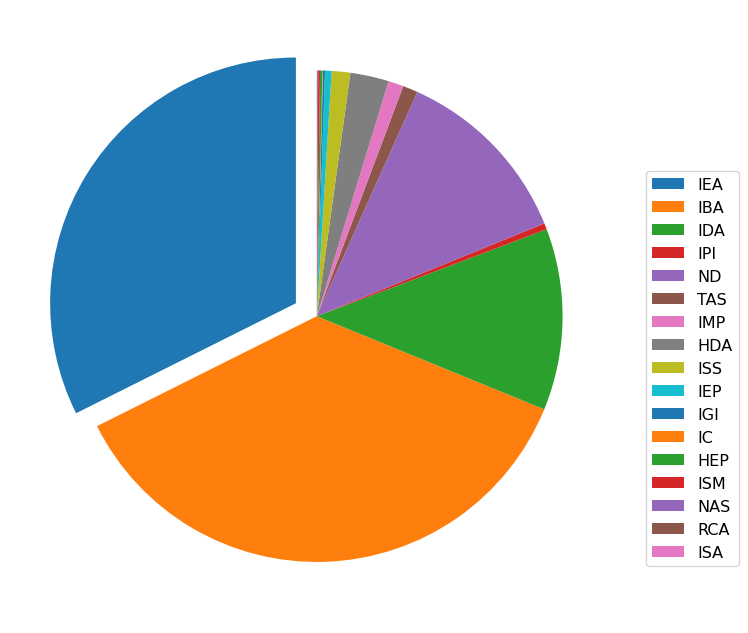

In [42]:
# Declare matplotlib as inline and import pyplot
%matplotlib inline
from matplotlib import pyplot

# Setup the figure
fig = pyplot.figure(1, figsize=(8,8), dpi=96)
ax=fig.add_axes([0.1,0.1,0.8,0.8])

# Extract the lables / percentages
labels = evidence_percent.keys()
fracs = evidence_percent.values()

# Make IEA obvious by "exploding" it
explode = [int('IEA' in x)*0.1 for x in labels]

# Plot the pie chart
patches, texts = ax.pie(list(fracs), explode=explode, startangle=90, labeldistance=1.1) 

# Add 
ax.legend(patches, labels, bbox_to_anchor=(1.2, 0.75), fontsize=12)
pyplot.show()